**Загрузка данных и знакомство с ними**

In [47]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle
import bokeh

In [2]:
df = pd.read_csv('../data/dataset.csv')

In [3]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


###### Вывод: Всего в выборке 301 запись

**Очистка данных**

In [5]:
df['Year'] = df['Year'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Selling_type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Fuel_Type'].astype('category')

In [6]:
df['Driven_kms'] = df['Driven_kms'].astype('int32')
df['Owner'] = df['Owner'].astype('int16')

In [7]:
df['Selling_Price'] = df['Selling_Price'].astype('float16')
df['Present_Price'] = df['Present_Price'].astype('float16')

###### Вывод: Привели признаки к соответствующим типам данных

In [8]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,4.660156,7.628906,36947.205980,0.043189
std,5.082031,8.640625,38886.883882,0.247915
min,0.099976,0.320068,500.000000,0.000000
25%,0.899902,1.200195,15000.000000,0.000000
50%,3.599609,6.398438,32000.000000,0.000000
75%,6.000000,9.898438,48767.000000,0.000000
max,35.000000,92.625000,500000.000000,3.000000


In [9]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Year', 'Fuel_Type', 'Selling_type', 'Transmission']

In [10]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [ ]:
df = df.drop(columns=['Car_Name']) # уменьшили размер в 3 раза (7.5 kб против 21.3)

In [12]:
df.drop_duplicates(inplace=True)

In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           299 non-null    category
 1   Selling_Price  299 non-null    float16 
 2   Present_Price  299 non-null    float16 
 3   Driven_kms     299 non-null    int32   
 4   Fuel_Type      299 non-null    category
 5   Selling_type   299 non-null    category
 6   Transmission   299 non-null    category
 7   Owner          299 non-null    int16   
dtypes: category(4), float16(2), int16(1), int32(1)
memory usage: 7.5 KB


###### Вывод: в ходе очистки данных размер датасета был уменьшен в три раза, также были удалены 2 дубликата

In [17]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Year - numer of unique = 16
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 3
Transmission - numer of unique = 3


In [18]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Year: Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2004     1
2018     1
Name: count, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


**Анализ признаков для модели**

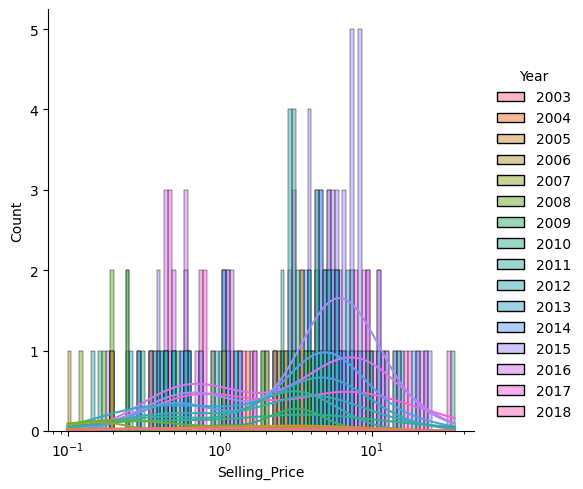

In [19]:
sns.displot(df, x='Selling_Price', bins=100, hue='Year', kde=True, log_scale=True)

###### Вывод: можно выявить тенденцию, что с годом выпуска автомобиля возрастает цена продажи автомобиля. Также, по всей видимости, в наибольшем количестве продаются модели второй половины 2010-ых годов

In [21]:
# Создаем новый признак
df['car_mileage'] = df.apply(lambda x: 'low' if x['Driven_kms'] < 10000 \
                             else 'high' if x['Driven_kms'] > 50000 \
                             else 'mid', axis = 1) 

def getPriceDiff(x, y):
    return x/y

df['price_diff'] = df.apply(lambda x: getPriceDiff(x['Selling_Price'], x['Present_Price']), axis = 1) 
num_features = df.select_dtypes(include=['number']).columns.to_list()
df.describe()


,Selling_Price,Present_Price,Driven_kms,Owner,price_diff
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589844,7.539062,36916.752508,0.043478,0.633561
std,4.984375,8.562500,39015.170352,0.248720,0.202806
min,0.099976,0.320068,500.000000,0.000000,0.105332
25%,0.849854,1.200195,15000.000000,0.000000,0.504931
50%,3.509766,6.101562,32000.000000,0.000000,0.653345
75%,6.000000,9.839844,48883.500000,0.000000,0.790299
max,35.000000,92.625000,500000.000000,3.000000,0.988982


###### Создали категориальный признак, отвечающий за "величину" пробега авто (маленький пробег - меньше 10 тыс. км, средний - от 10 до 50 тыс. км, большой - от 50 тыс. км). Также создали признак "price_diff", отображающий разницу между продажей и покупкой авто

In [22]:
df['car_mileage'].value_counts()

car_mileage
mid     186
high     66
low      47
Name: count, dtype: int64

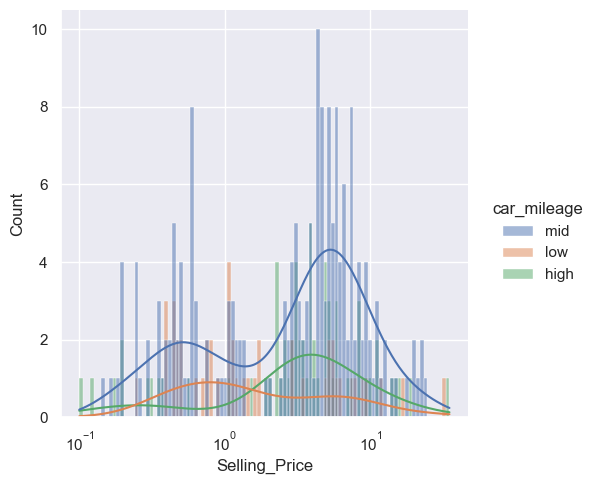

In [23]:
sns.displot(df, x='Selling_Price', bins=100, hue='car_mileage', kde=True, log_scale=True)

###### Вывод: лучше всего продаются авто со "средним" уровнем пробега. Среди машин с более дешевой ценой продажи популярны машины с низким уровнем пробега, а среди машин с более высокой ценой продажи - машины с более высоким пробегом

<Axes: >

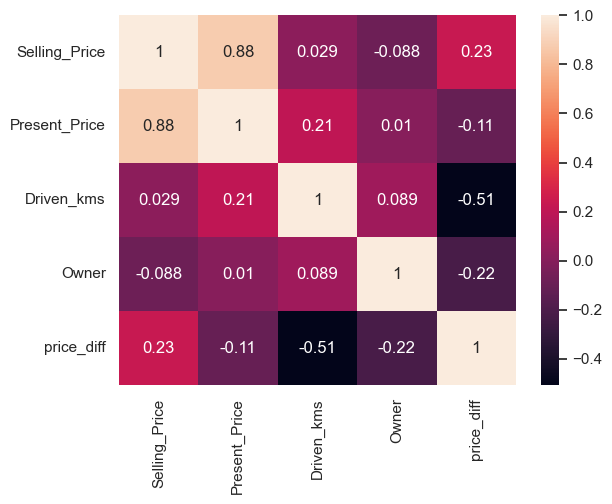

In [24]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

###### Вывод: наблюдается высокая корелляция между ценой продажи и ценой покупки авто. Также заметна обратная корелляция между пробегом и разностью между покупкой и продажи авто

In [30]:
def flat_index(df_stats): 
    df_stats.columns = df_stats.columns.get_level_values(0) + '_' +  df_stats.columns.get_level_values(1) 
    df_stats.columns = df_stats.columns.to_flat_index() 
    df_stats.reset_index(inplace=True) 
    return df_stats

In [67]:
aggregated_df = df[num_features+['Year']].groupby(by='Year').agg(['mean', 'std'])
aggregated_df = flat_index(aggregated_df)
aggregated_df 

C:\Users\shepe\AppData\Local\Temp\ipykernel_22004\1870850199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df[num_features+['Year']].groupby(by='Year').agg(['mean', 'std'])


,Year,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std,Owner_mean,Owner_std,price_diff_mean,price_diff_std
0,2003,1.300049,1.343434,5.129883,4.031337,94500.000000,45961.940777,0.000000,0.000000,0.217769,0.090750
1,2004,1.500000,NaN,12.351562,NaN,135154.000000,NaN,0.000000,NaN,0.121442,NaN
2,2005,2.487488,1.565491,9.486206,6.153806,104294.000000,63559.476692,0.000000,0.000000,0.283908,0.045014
3,2006,1.437347,1.081137,9.058594,10.175851,87422.250000,40295.305950,0.750000,1.500000,0.191975,0.085198
4,2007,0.159973,0.056537,0.665039,0.120153,51000.000000,2828.427125,0.500000,0.707107,0.236731,0.042243
5,2008,1.002877,1.471779,4.759556,8.305253,112128.571429,173231.489769,0.142857,0.377964,0.294334,0.079809
6,2009,2.816650,1.085745,10.601562,5.902264,67820.500000,16201.723411,0.000000,0.000000,0.312393,0.107691
7,2010,5.262606,8.766931,14.332877,23.118814,60014.066667,45429.155164,0.066667,0.258199,0.389182,0.101678
8,2011,2.375251,1.477055,5.147795,3.927056,40327.368421,23467.977897,0.052632,0.229416,0.491541,0.128533
9,2012,3.841192,3.942804,7.984502,8.517218,43798.217391,25502.573966,0.043478,0.208514,0.506650,0.091269


###### Сгруппировали выборку по году выпуска авто

<Axes: xlabel='Year', ylabel='Selling_Price_mean'>

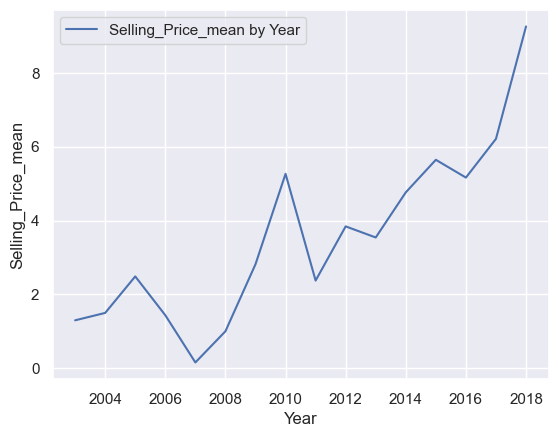

In [70]:
sns.lineplot(aggregated_df,x='Year',y='Selling_Price_mean', label='Selling_Price_mean by Year')

###### Вывод: наблюдается тенденция увеличения стоимости продажи в зависимости от года его выпуска

<Axes: xlabel='Year', ylabel='Present_Price_mean'>

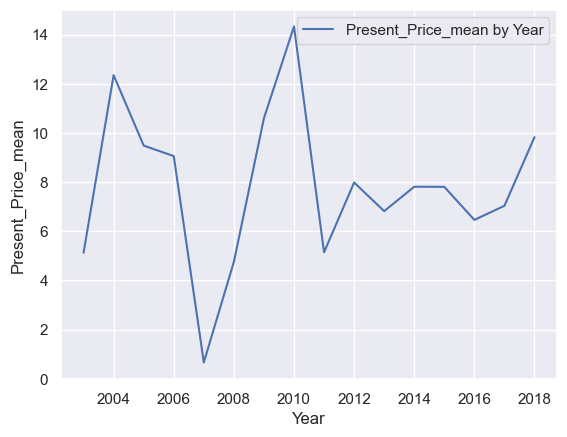

In [69]:
sns.lineplot(aggregated_df,x='Year',y='Present_Price_mean', label='Present_Price_mean by Year')


###### Вывод: тренд изменения средней цена покупки авто в зависимости от года выпуска авто в целом не наблюдается. Также можно обратить внимание на то, что для авто начиная с годом выпуска от 2011 года средняя цена покупки авто стала намного стабильнее

<Axes: xlabel='Year', ylabel='price_diff_mean'>

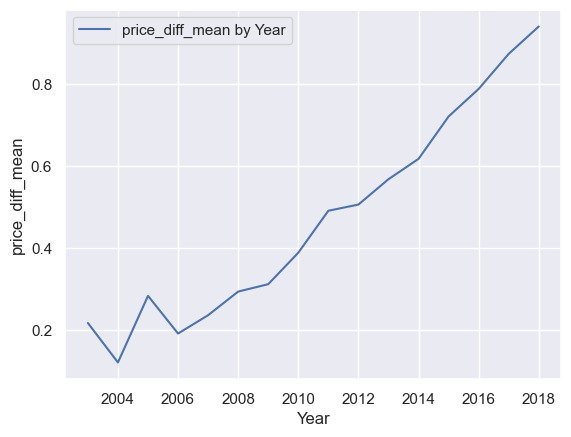

In [68]:
sns.lineplot(aggregated_df,x='Year',y='price_diff_mean', label='price_diff_mean by Year')

###### Вывод: чем новее автомобиль, тем больше разница между покупкой и продажей авто

<Axes: xlabel='Year', ylabel='Driven_kms'>

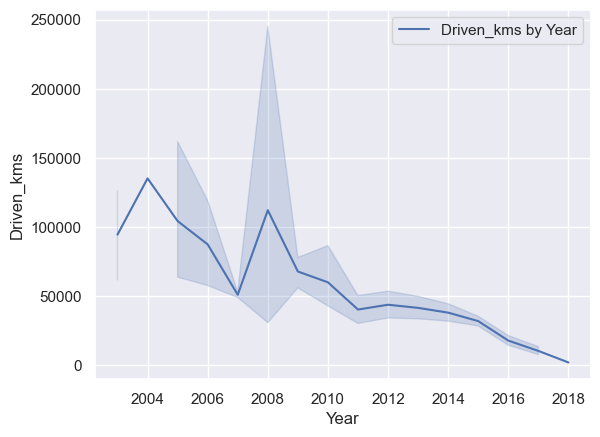

In [65]:
sns.lineplot(df, x='Year', y='Driven_kms', label='Driven_kms by Year')

###### Вывод: люди чаще передвигаются на авто более старого года выпуска

In [37]:
aggregated_df = df[num_features+['Fuel_Type']].groupby(by='Fuel_Type').agg(['mean', 'std'])
aggregated_df = flat_index(aggregated_df)
aggregated_df 

C:\Users\shepe\AppData\Local\Temp\ipykernel_22004\48671938.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df[num_features+['Fuel_Type']].groupby(by='Fuel_Type').agg(['mean', 'std'])


,Fuel_Type,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std,Owner_mean,Owner_std,price_diff_mean,price_diff_std
0,CNG,3.099609,0.212684,6.414062,1.872728,42749.000000,10251.634114,0.000000,0.000000,0.509824,0.182013
1,Diesel,10.102438,7.103011,15.646889,13.563592,50675.775862,30495.519576,0.017241,0.131306,0.677713,0.172998
2,Petrol,3.264136,3.135525,5.583563,5.287752,33528.937238,40308.984886,0.050209,0.270368,0.623881,0.208553


###### Сгруппировали выборку по типу топлива авто

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price_mean'>

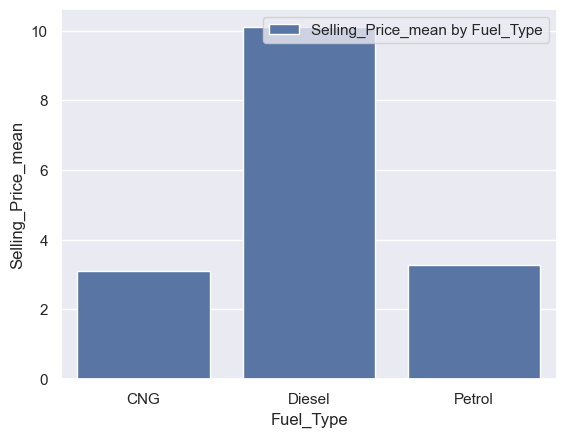

In [43]:
sns.barplot(aggregated_df, x="Fuel_Type", y="Selling_Price_mean", label="Selling_Price_mean by Fuel_Type")

###### Вывод: самыми дорогими являются автомобили, использующие дизельное топливо

<Axes: xlabel='Fuel_Type', ylabel='Driven_kms_mean'>

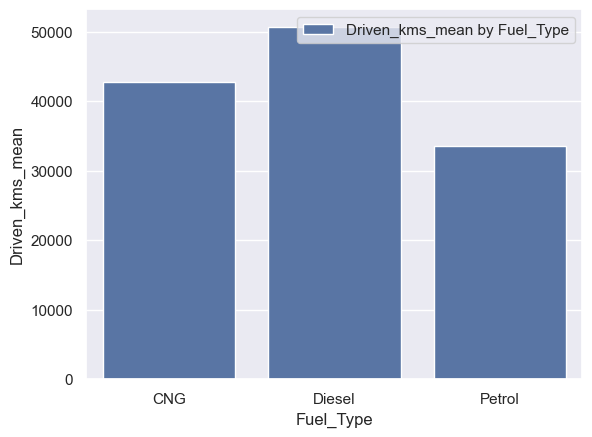

In [44]:
sns.barplot(aggregated_df, x="Fuel_Type", y="Driven_kms_mean", label="Driven_kms_mean by Fuel_Type")

###### Вывод: самый большой пробег среди авто с дизельным топливом. Самый маленький - с бензиновым топливом

In [48]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook()

Loading BokehJS ...

In [71]:
source = ColumnDataSource(data=df.sample(frac=1))
p = figure(width=1000)
p.scatter(source=source, x='Owner', y='Selling_Price' )
hover = HoverTool(tooltips=[('year ', '@Year'),
                              ('price', '@Selling_Price'),
                              ('mileage', '@mileage_level')])

p.add_tools(hover)
show(p)

###### Вывод: чем больше было владельцев у автомобиля, тем меньше цена его продажи

In [64]:
source = ColumnDataSource(data=df.sample(frac=1))
p = figure(width=1000)
p.scatter(source=source, x='Year', y='Driven_kms' )
hover = HoverTool(tooltips=[('year', '@Year'),
                              ('driven kms', '@Driven_kms'),
                              ('mileage', '@mileage_level')])

p.add_tools(hover)
show(p)

###### Вывод: с течением времени наблюдается тенденция уменьшения пробега авто

**Сохранение финального датасета**

In [61]:
df.to_pickle('../data/clean_data.pkl')